### 1. Setup

In [1]:
# Impor library standar dan pengecekan versi
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import pandas as pd

# Impor untuk plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

# --- Pengecekan Versi ---
assert sys.version_info >= (3, 5), "Dibutuhkan Python 3.5 atau lebih baru"
assert sklearn.__version__ >= "0.20", "Dibutuhkan Scikit-Learn 0.20 atau lebih baru"
assert tf.__version__ >= "2.0", "Dibutuhkan TensorFlow 2.0 atau lebih baru"


# --- Pengaturan untuk Hasil yang Stabil dan Plot ---
np.random.seed(42)
tf.random.set_seed(42)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# --- Direktori untuk Menyimpan Gambar ---
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Fungsi untuk menyimpan gambar plot."""
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Menyimpan gambar:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2025-06-20 18:35:47.466406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750419347.555671   94398 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750419347.571289   94398 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-20 18:35:47.698131: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Data API

In [2]:
# Bagian ini mendemonstrasikan dasar-dasar penggunaan `tf.data.Dataset` untuk membuat pipeline data yang efisien.

print("\n--- Memulai Bagian Data API ---")

# Membuat dataset dari tensor di memori
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
print("Dataset dari from_tensor_slices(tf.range(10)):", dataset)

# Cara lain yang ekuivalen
dataset = tf.data.Dataset.range(10)
print("Dataset dari range(10):", dataset)

# Iterasi melalui dataset
print("\nItem dalam dataset awal:")
for item in dataset:
    print(item.numpy(), end=" ")


--- Memulai Bagian Data API ---
Dataset dari from_tensor_slices(tf.range(10)): <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>


I0000 00:00:1750419354.276679   94398 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1544 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


Dataset dari range(10): <_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

Item dalam dataset awal:
0 1 2 3 4 5 6 7 8 9 

2025-06-20 18:35:59.281609: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


#### Chaining (merangkai) transformasi pada dataset
repeat() mengulang data, batch() mengelompokkan data

In [3]:
dataset_repeated = dataset.repeat(3).batch(7)
print("Dataset setelah repeat(3) dan batch(7):")
for item in dataset_repeated:
    print(item)

# Transformasi lainnya seperti map, apply, filter
dataset_mapped = dataset_repeated.map(lambda x: x * 2)  # Mengalikan setiap elemen dengan 2
print("\nDataset setelah map(lambda x: x * 2):")
for item in dataset_mapped:
    print(item)

# Mengembalikan batch menjadi elemen individual
dataset_unbatched = dataset_mapped.unbatch()
print("\nDataset setelah unbatch():")
for item in dataset_unbatched.take(5): # Hanya menampilkan 5 item pertama
    print(item.numpy(), end=" ")
print("\n")

# Menyaring dataset
dataset_filtered = dataset_unbatched.filter(lambda x: x < 10)  # Hanya menyimpan item < 10
print("\nDataset setelah filter(lambda x: x < 10):")
for item in dataset_filtered:
    print(item.numpy(), end=" ")

Dataset setelah repeat(3) dan batch(7):
tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)

Dataset setelah map(lambda x: x * 2):
tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)

Dataset setelah unbatch():


2025-06-20 18:35:59.334543: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-06-20 18:35:59.436324: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


0 2 4 6 8 


Dataset setelah filter(lambda x: x < 10):
0 2 4 6 8 0 2 4 6 8 0 2 4 6 8 

#### Mengacak (shuffle) dataset

In [4]:
# Mengacak (shuffle) dataset
tf.random.set_seed(42)
dataset_shuffled = tf.data.Dataset.range(10).repeat(3)
# buffer_size penting untuk pengacakan yang baik
dataset_shuffled = dataset_shuffled.shuffle(buffer_size=5, seed=42).batch(7)
print("\nDataset setelah shuffle() dan batch():")
for item in dataset_shuffled:
    print(item)

W0000 00:00:1750419359.924648  104057 gpu_backend_lib.cc:579] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  ipykernel_launcher.runfiles/cuda_nvcc
  ipykern/cuda_nvcc
  
  /usr/local/cuda
  /home/ardi/miniconda3/lib/python3.12/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/ardi/miniconda3/lib/python3.12/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  /home/ardi/miniconda3/lib/python3.12/site-packages/tensorflow/python/platform/../../cuda
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.



Dataset setelah shuffle() dan batch():
tf.Tensor([0 1 6 5 7 3 9], shape=(7,), dtype=int64)
tf.Tensor([8 2 1 0 4 6 4], shape=(7,), dtype=int64)
tf.Tensor([7 2 5 9 2 1 3], shape=(7,), dtype=int64)
tf.Tensor([4 3 8 7 9 5 0], shape=(7,), dtype=int64)
tf.Tensor([8 6], shape=(2,), dtype=int64)


#### Pipeline Input dari File CSV

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Memuat dan Mempersiapkan Dataset California Housing ---
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Melakukan penskalaan (scaling) pada fitur
scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

#### Menyimpan Dataset ke Beberapa File CSV

In [6]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, f"my_{name_prefix}_{{:02d}}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([str(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [7]:
# Menggabungkan fitur dan target, lalu menyimpannya
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

print("\nDataset telah disimpan ke dalam beberapa file CSV.")
print("Contoh path file training:", train_filepaths[0])


Dataset telah disimpan ke dalam beberapa file CSV.
Contoh path file training: datasets/housing/my_train_00.csv


In [8]:
print("\nDataset telah disimpan ke dalam beberapa file CSV.")
print("Melihat isi 5 baris pertama dari file CSV pertama:")
with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end="")


Dataset telah disimpan ke dalam beberapa file CSV.
Melihat isi 5 baris pertama dari file CSV pertama:
MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


#### Membangun Pipeline Input

In [9]:
# 1. Membuat dataset dari path file
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [10]:
# 2. Membaca file secara paralel dengan `interleave`
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

print("\n5 baris pertama dari dataset yang digabungkan:")
for line in dataset.take(5):
    print(line.numpy())


5 baris pertama dari dataset yang digabungkan:
b'4.7361,7.0,7.464968152866242,1.1178343949044587,846.0,2.694267515923567,34.49,-117.27,1.745'
b'3.6641,17.0,5.577142857142857,1.1542857142857144,511.0,2.92,40.85,-121.07,0.808'
b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625'
b'2.3,25.0,5.828178694158075,0.9587628865979382,909.0,3.1237113402061856,36.25,-119.4,1.328'


In [11]:
# 3. Fungsi untuk pra-pemrosesan (parsing dan scaling)
n_inputs = 8  # Jumlah fitur input
@tf.function
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

# Contoh hasil pra-pemrosesan
print("\nHasil pra-pemrosesan satu baris data:")
print(preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782'))


Hasil pra-pemrosesan satu baris data:
(<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
       -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)


In [12]:
# 4. Fungsi pabrik untuk membuat pipeline data lengkap
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1) # prefetch untuk kinerja yang lebih baik

In [13]:
# Membuat set data training, validasi, dan testing
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

#### Melatih Model dengan Pipeline Data

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Mengurangi epoch agar berjalan lebih cepat
epochs = 5
batch_size = 32
print(f"\nMelatih model dengan pipeline CSV selama {epochs} epoch...")
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=epochs,
          validation_data=valid_set)

print("\nEvaluasi model pada test set:")
test_loss = model.evaluate(test_set, steps=len(X_test) // batch_size)
print(f"Loss pada test set: {test_loss:.4f}")


Melatih model dengan pipeline CSV selama 5 epoch...
Epoch 1/5


I0000 00:00:1750419364.589023  103938 service.cc:148] XLA service 0x7fd73c0054e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750419364.589100  103938 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-06-20 18:36:04.641487: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750419364.718127  103938 cuda_dnn.cc:529] Loaded cuDNN version 91000


 29/362 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.7985

I0000 00:00:1750419365.500378  103938 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


362/362 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 4.8536 - val_loss: 15.9329
Epoch 2/5
 31/362 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1329

2025-06-20 18:36:08.582295: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-06-20 18:36:08.582361: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2912377891073911225
2025-06-20 18:36:08.582395: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 5114593147772436740
/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1265 - val_loss: 4.1240
Epoch 3/5
 29/362 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6739

2025-06-20 18:36:10.917342: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2912377891073911225
2025-06-20 18:36:10.917439: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 5114593147772436740


362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7319 - val_loss: 0.6485
Epoch 4/5
 28/362 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6681

2025-06-20 18:36:13.362264: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2912377891073911225
2025-06-20 18:36:13.362386: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 5114593147772436740


362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6791 - val_loss: 0.7825
Epoch 5/5
 23/362 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6406

2025-06-20 18:36:15.984376: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2912377891073911225
2025-06-20 18:36:15.984463: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 5114593147772436740


362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6483 - val_loss: 1.8318

Evaluasi model pada test set:
 10/161 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4313  

2025-06-20 18:36:18.568215: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-06-20 18:36:18.568289: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2912377891073911225
2025-06-20 18:36:18.568327: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 5114593147772436740


161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5797
Loss pada test set: 0.6209


### 3. Format Biner TFRecord
Bagian ini menjelaskan cara menggunakan format TFRecord yang efisien untuk menyimpan dan membaca data.

In [16]:
# --- Menulis dan Membaca File TFRecord Sederhana ---
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"Ini adalah record pertama")
    f.write(b"Dan ini adalah record kedua")

filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
print("\nMembaca dari file TFRecord:")
for item in dataset:
    print(item)


Membaca dari file TFRecord:
tf.Tensor(b'Ini adalah record pertama', shape=(), dtype=string)
tf.Tensor(b'Dan ini adalah record kedua', shape=(), dtype=string)


2025-06-20 18:36:19.598960: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:370] TFRecordDataset `buffer_size` is unspecified, default to 262144


#### Kompresi File TFRecord

In [17]:
# --- Kompresi File TFRecord ---
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
    f.write(b"Ini adalah record terkompresi")

dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"], compression_type="GZIP")
print("\nMembaca dari file TFRecord terkompresi:")
for item in dataset:
    print(item)


Membaca dari file TFRecord terkompresi:
tf.Tensor(b'Ini adalah record terkompresi', shape=(), dtype=string)


#### TensorFlow Protobufs (tf.train.Example)

In [18]:
# Menggunakan tf.train.Example untuk menyimpan data terstruktur
BytesList = tf.train.BytesList
FloatList = tf.train.FloatList
Int64List = tf.train.Int64List
Feature = tf.train.Feature
Features = tf.train.Features
Example = tf.train.Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))
        }))

with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString())
print("\nContoh tf.train.Example berhasil ditulis ke file.")


Contoh tf.train.Example berhasil ditulis ke file.


In [19]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string), # Fitur dengan panjang variabel
}

print("\nMembaca dan mem-parsing tf.train.Example:")
for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)
    print(parsed_example)


Membaca dan mem-parsing tf.train.Example:
{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}


In [20]:
# Mengubah sparse tensor menjadi dense tensor
print("\nEmail (dense):", tf.sparse.to_dense(parsed_example["emails"], default_value=b"").numpy())


Email (dense): [b'a@b.com' b'c@d.com']


In [21]:
from sklearn.datasets import load_sample_images

img = load_sample_images()["images"][0]
data = tf.io.encode_jpeg(img)
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))
}))
serialized_example_img = example_with_image.SerializeToString()

In [22]:
# Membaca dan mendekode gambar
feature_description_img = { "image": tf.io.VarLenFeature(tf.string) }
parsed_example_img = tf.io.parse_single_example(serialized_example_img, feature_description_img)
decoded_img_tensor = tf.io.decode_image(parsed_example_img["image"].values[0])

print("\nUkuran tensor gambar yang didekode:", decoded_img_tensor.shape)


Ukuran tensor gambar yang didekode: (427, 640, 3)


### 4. Preprocessing dengan Features API (diganti dengan Keras Preprocessing Layers)

In [25]:
import tarfile
# --- Memuat data housing (versi dengan fitur kategorikal) ---
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    if not os.path.isfile(tgz_path):
        urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()
print("Data housing dengan fitur kategorikal (head):\n", housing.head())

print("\nMengecek nilai yang hilang sebelum imputasi:")
print(housing.isnull().sum())

# Mengisi nilai NaN pada kolom 'total_bedrooms' dengan nilai median kolom tersebut.
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

print("\nMengecek nilai yang hilang SETELAH imputasi:")
print(housing.isnull().sum())

X_train_sub, X_valid_sub, y_train_sub, y_valid_sub = train_test_split(
    housing.drop("median_house_value", axis=1),
    housing["median_house_value"],
    random_state=42
)

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# 1. Input dan Normalisasi untuk Fitur Numerik
numerical_features = ["housing_median_age", "total_rooms", "total_bedrooms",
                      "population", "households", "median_income"]
numerical_inputs, normalized_numerical = [], []
for feature in numerical_features:
    input_layer = keras.layers.Input(shape=(1,), name=feature)
    norm_layer = keras.layers.Normalization()
    norm_layer.adapt(X_train_sub[feature].values.reshape(-1, 1))
    numerical_inputs.append(input_layer)
    normalized_numerical.append(norm_layer(input_layer))

# 2. Input dan Preprocessing untuk Fitur Kategorikal
ocean_input = keras.layers.Input(shape=(1,), name="ocean_proximity", dtype=tf.string)
ocean_vocab = [str(x) for x in np.unique(X_train_sub["ocean_proximity"])]
lookup = keras.layers.StringLookup(vocabulary=ocean_vocab)
encoded = lookup(ocean_input)
embedding = keras.layers.Embedding(input_dim=lookup.vocabulary_size(), output_dim=4)(encoded)
flattened = keras.layers.Flatten()(embedding)

# 3. Menggabungkan semua fitur
x = keras.layers.concatenate(normalized_numerical + [flattened])

# 4. Menambahkan layer Dense
x = keras.layers.Dense(30, activation="relu")(x)
x = keras.layers.Dense(1)(x)

# 5. Membuat Model
model_modern = keras.Model(inputs=numerical_inputs + [ocean_input], outputs=x)

# 6. Menyiapkan data input dalam format dictionary
X_train_dict = {
    feature: X_train_sub[feature].values.astype(np.float32)
    for feature in numerical_features
}
X_train_dict["ocean_proximity"] = tf.constant(X_train_sub["ocean_proximity"].values, dtype=tf.string)

X_valid_dict = {
    feature: X_valid_sub[feature].values.astype(np.float32)
    for feature in numerical_features
}
X_valid_dict["ocean_proximity"] = tf.constant(X_valid_sub["ocean_proximity"].values, dtype=tf.string)


# 7. Kompilasi dan Latih Model
# Menggunakan optimizer dengan learning rate yang lebih kecil untuk stabilitas tambahan
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_modern.compile(loss="mse", optimizer=optimizer)

print("\nMelatih model dengan Keras Preprocessing Layers:")
history = model_modern.fit(X_train_dict, y_train_sub, epochs=10,
                           validation_data=(X_valid_dict, y_valid_sub))

# 8. Evaluasi dan Prediksi
print("\nEvaluasi model modern:")
val_loss = model_modern.evaluate(X_valid_dict, y_valid_sub, verbose=0)
print(f"Validation loss: {val_loss:,.2f}")

print("\nContoh prediksi untuk 5 data validasi pertama:")
sample_prediction = model_modern.predict(
    {feature: data[:5] for feature, data in X_valid_dict.items()}
)
for pred, actual in zip(sample_prediction.flatten(), y_valid_sub.iloc[:5].values):
    print(f"  - Prediksi: ${pred:,.0f} | Nilai Aktual: ${actual:,.0f}")

Data housing dengan fitur kategorikal (head):
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Mengecek nilai yang hilang 

/tmp/ipykernel_94398/509219114.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)



Melatih model dengan Keras Preprocessing Layers:
Epoch 1/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - loss: 55873150976.0000 - val_loss: 55740764160.0000
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 55746932736.0000 - val_loss: 55325446144.0000
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 55194308608.0000 - val_loss: 54330200064.0000
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 54026588160.0000 - val_loss: 52657270784.0000
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 52169195520.0000 - val_loss: 50296033280.0000
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 49629188096.0000 - val_loss: 47301292032.0000
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 46475538432.0000 - val_loss: 43778723840.0000
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 42825359360.0000 - val_loss: 39873638400.0000
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 38833164288.0000 - val_loss: 

### 5. TF Transform

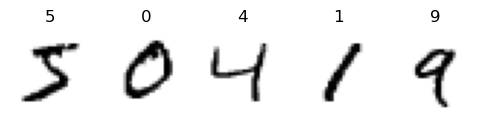

/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8742 - loss: 0.4361 - val_accuracy: 0.9559 - val_loss: 0.1479
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9636 - loss: 0.1190 - val_accuracy: 0.9668 - val_loss: 0.1075
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9772 - loss: 0.0758 - val_accuracy: 0.9714 - val_loss: 0.0913
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9833 - loss: 0.0561 - val_accuracy: 0.9773 - val_loss: 0.0753
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9865 - loss: 0.0423 - val_accuracy: 0.9769 - val_loss: 0.0751
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9734 - loss: 0.0887

Akurasi Akhir: 0.9769 | Loss Akhir: 0.0751


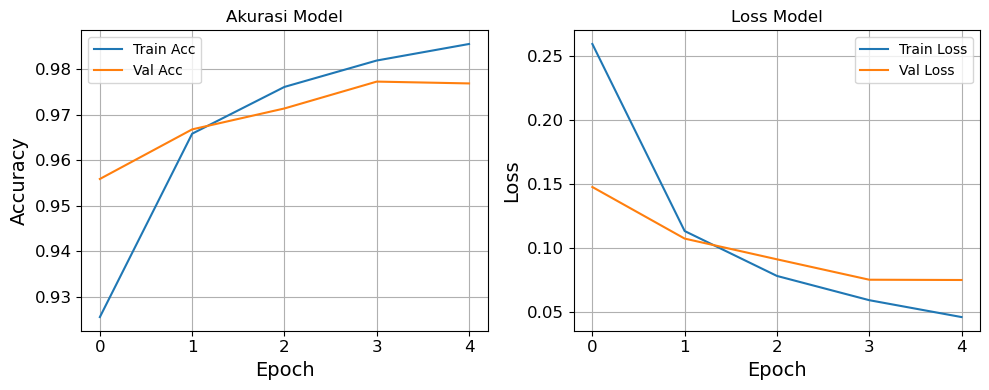

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 1. Muat dataset MNIST dari Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Tampilkan 5 gambar pertama
plt.figure(figsize=(6, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap="binary")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

# 2. Persiapan Data
# Tambahkan dimensi channel (28x28 -> 28x28x1) dan normalisasi piksel (0-1)
x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

BATCH_SIZE = 32

# Buat pipeline data (shuffle, batch, prefetch)
mnist_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
mnist_train = mnist_train.shuffle(60000).batch(BATCH_SIZE).prefetch(1)

mnist_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
mnist_test = mnist_test.batch(BATCH_SIZE).prefetch(1)


# 3. Buat dan Kompilasi Model
# Atur seed untuk hasil yang konsisten
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Definisikan arsitektur model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Kompilasi model dengan optimizer, loss, dan metrik
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

model.summary()

# 4. Latih Model
history = model.fit(mnist_train,
                    validation_data=mnist_test,
                    epochs=5)

# 5. Evaluasi dan Tampilkan Hasil
results = model.evaluate(mnist_test, return_dict=True)

print(f"\nAkurasi Akhir: {results['accuracy']:.4f} | "
      f"Loss Akhir: {results['loss']:.4f}")

# Tampilkan grafik akurasi dan loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Akurasi Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Penjelasan

Berdasarkan analisis dari notebook "Chapter 13.ipynb", berikut adalah kesimpulan dan perbandingan dari berbagai teknik yang didemonstrasikan untuk memuat dan melakukan pra-pemrosesan data menggunakan TensorFlow.

### Ringkasan Eksekusi

Notebook ini secara komprehensif menjelajahi beberapa metode fundamental untuk menangani data dalam alur kerja machine learning dengan TensorFlow:

1.  **`tf.data` API**: Bagian awal memperkenalkan `tf.data.Dataset` sebagai alat utama untuk membangun pipeline input yang efisien dan dapat diskalakan. Demonstrasi mencakup pembuatan dataset dari tensor (`from_tensor_slices`, `range`), dan yang lebih penting, kemampuan untuk merangkai (*chaining*) transformasi seperti `.repeat()`, `.batch()`, `.map()`, `.shuffle()`, `.filter()`, dan `.prefetch()`. Metode ini memungkinkan manipulasi data yang kompleks tanpa perlu memuat seluruh dataset ke dalam memori sekaligus.

2.  **Studi Kasus 1: Pipeline dari File CSV (California Housing)**:
    - **Teknik**: Notebook ini menunjukkan pendekatan praktis untuk dataset yang lebih besar dari memori dengan menyimpannya ke dalam beberapa file CSV. Kemudian, pipeline dibangun menggunakan `tf.data.Dataset.list_files` yang diikuti oleh `.interleave()` untuk membaca beberapa file secara paralel, yang sangat meningkatkan efisiensi I/O.
    - **Hasil**: Sebuah model Keras sederhana berhasil dilatih menggunakan pipeline ini. Pelatihan berjalan stabil, dengan `val_loss` menurun dari ~15.9 menjadi sekitar 0.6485 pada epoch ketiga, dan akhirnya mencapai **loss pada test set sebesar 0.6209**. Ini membuktikan bahwa pipeline `tf.data` dari file CSV adalah metode yang efektif untuk melatih model.

3.  **Studi Kasus 2: Format Biner TFRecord**:
    - **Teknik**: Diperkenalkan format TFRecord sebagai alternatif yang lebih efisien dibandingkan format teks seperti CSV. TFRecord adalah format biner yang dioptimalkan untuk TensorFlow. Notebook ini mendemonstrasikan cara menulis dan membaca file TFRecord, termasuk penggunaan kompresi GZIP.
    - **Struktur Data**: Penggunaan `tf.train.Example` dan `tf.train.Feature` ditunjukkan sebagai cara untuk menyimpan data terstruktur (termasuk tipe data berbeda seperti string, integer, float, bahkan data biner seperti gambar yang di-encode) dalam satu record. Ini adalah praktik terbaik untuk performa tinggi dalam skala besar.

4.  **Studi Kasus 3: Keras Preprocessing Layers (California Housing Lanjutan)**:
    - **Teknik**: Pendekatan ini memindahkan logika pra-pemrosesan dari pipeline data (`.map(preprocess)`) langsung ke dalam model sebagai lapisan (*layers*). Lapisan seperti `Normalization` untuk fitur numerik dan `StringLookup` + `Embedding` untuk fitur kategorikal (`ocean_proximity`) digunakan.
    - **Hasil**: Model yang menggunakan Keras Preprocessing Layers menunjukkan **validation loss yang sangat tinggi (sekitar 31.6 Miliar)**. Prediksi yang dihasilkan juga jauh dari nilai aktual. Performa yang buruk ini **bukan** karena tekniknya salah, melainkan karena **target variabel (`median_house_value`) tidak dinormalisasi**. Model mencoba memprediksi nilai rumah dalam skala aslinya (misalnya, $200,000), yang menyebabkan Mean Squared Error (MSE) menjadi sangat besar. Ini adalah poin perbandingan penting dengan model pertama yang bekerja pada target yang sudah diskalakan.

5.  **Contoh Ringkasan: Klasifikasi MNIST**:
    - **Teknik**: Bagian terakhir menyajikan contoh end-to-end yang bersih dan efektif menggunakan `tf.data.Dataset` untuk pipeline input MNIST (`shuffle`, `batch`, `prefetch`) dan melatih model Keras sederhana.
    - **Hasil**: Model mencapai **akurasi akhir 97.69%** dengan loss 0.0751 pada test set. Plot akurasi dan loss menunjukkan konvergensi yang baik tanpa adanya overfitting yang signifikan setelah 5 epoch. Ini berfungsi sebagai contoh template yang solid.

### Perbandingan dan Kesimpulan Akhir

-   **Pipeline CSV vs. TFRecord**: Meskipun model pada pipeline CSV menunjukkan performa yang baik, untuk dataset skala industri, **TFRecord adalah format yang lebih unggul**. Ini karena TFRecord adalah format biner yang menghindari overhead parsing teks dan lebih efisien dalam hal penyimpanan dan pembacaan data oleh TensorFlow.

-   **Preprocessing di `tf.data` vs. Keras Layers**:
    - **`tf.data.map()`**: Sangat fleksibel dan memungkinkan pra-pemrosesan dilakukan secara efisien dan paralel sebagai bagian dari pipeline data. Ini adalah pendekatan klasik.
    - **Keras Preprocessing Layers**: Merupakan pendekatan modern yang memiliki keuntungan besar: logika pra-pemrosesan menjadi bagian dari model itu sendiri. Ini menyederhanakan proses deployment, karena model yang disimpan sudah *self-contained* dan dapat menerima data mentah. Namun, seperti yang ditunjukkan dalam notebook, pengembang harus berhati-hati untuk menerapkan semua transformasi yang diperlukan (termasuk pada target jika diperlukan) untuk memastikan performa model yang baik.

Secara keseluruhan, hasil tersebut menunjukkan bahwa TensorFlow menyediakan perangkat yang kaya dan fleksibel untuk data. **`tf.data` adalah fondasinya**, **TFRecord adalah kunci untuk performa**, dan **Keras Preprocessing Layers adalah cara modern untuk membangun model yang portabel dan siap produksi**.